In [1]:
from lightkurve import KeplerTargetPixelFile, KeplerLightCurveFile, lightcurve
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
target = 'kepler-109'
qRange = [1,17]

In [3]:
%%capture
lc = []
tpfs = []
for q in range(qRange[0],qRange[1]):
    try:
        lc.append(KeplerLightCurveFile.from_archive(target, quarter=q))
        tpfs.append(KeplerTargetPixelFile.from_archive(target, quarter=q))
    except:
        continue

In [4]:
%%capture
pipeline_lc = tpfs[0].to_lightcurve().flatten()
for tpf in tpfs:
    pipeline_lc = pipeline_lc.append(tpf.to_lightcurve().flatten())
    
pipeline_lc = pipeline_lc.remove_nans()
pipeline_lc = pipeline_lc.remove_outliers()

Text(0.5,1,'Pipeline Light Curve Kepler-109')

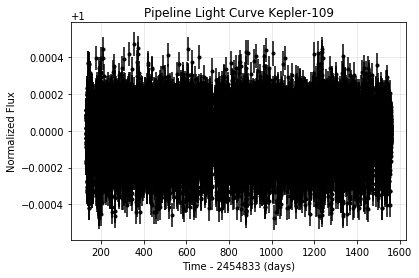

In [5]:
pipeline_lc.plot(marker='.',linestyle='none')
plt.title('Pipeline Light Curve Kepler-109')

In [6]:
log_list, trial_periods, period = lightcurve.iterative_box_period_search(lc = pipeline_lc, 
                                                  niters= 2, 
                                                  min_period= 5, 
                                                  max_period= 7, 
                                                  nperiods= 20000, 
                                                  period_scale= 'linear')
print(period)

  0%|          | 0/20000 [00:00<?, ?it/s]/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
  7%|▋         | 1354/20000 [01:58<27:05, 11.47it/s]

KeyboardInterrupt: 

In [11]:
folded_lc = (pipeline_lc.fold(period=6.482, phase=0.165).normalize())
final_lc = (folded_lc.bin())

Text(0.5,1,'Binned Data')

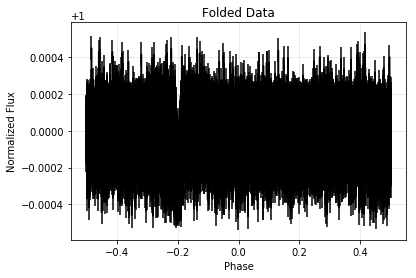

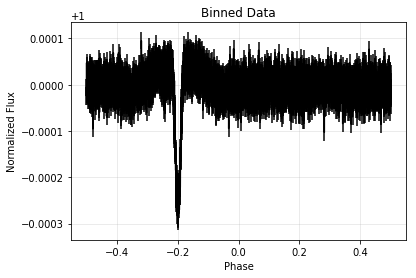

In [12]:
folded_lc.plot()
plt.title('Folded Data')
final_lc.plot()
plt.title('Binned Data')

In [20]:
depth = (0.00015-(-0.0003))/(0.00015)
print(depth, '(percentage)') 

3.0 (percentage)


In [2]:
Rp = (0.03**(.5))*1.32
print(Rp,'in solar radii')

0.22863070659909182 in solar radii


In [15]:
n = ((6.482**2)*(6.673e-11)*(2.069e30))
d = 4*(3.1415**2)
am = (n/d)**(1/3)
print(am, 'meters')

5277017.282212829 meters


In [18]:
a = am/(1.496e11)
print(a, 'au')

3.527417969393602e-05 au


In [23]:
print('could not find any similar stars with luminostiy values')

could not find any similar stars with luminostiy values
